<a href="https://colab.research.google.com/github/HoonC-corgi/Machine_Learning_SelfStudy/blob/main/07_3_Neuron_Network_Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 손실 곡선

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [4]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [5]:
# fit() 메소드는 내부적으로 history 객체를 반환함, fit() 메소드의 결과를 history 변수에 담으면,
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [6]:
# 훈련 측정값이 담겨 있는 history 딕셔너리의 값들을 확인 해보면,
print(history.history.keys())
# 손실과 정확도가 저자오디어 있음

dict_keys(['loss', 'accuracy'])


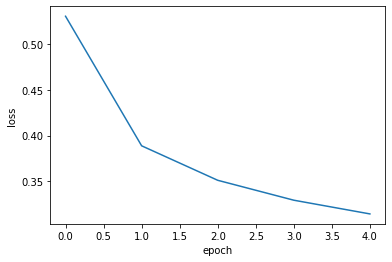

In [7]:
# history 속성에 포함된 손실과 정확도는 에포크마다 계산된 값이 순서대로 나열된 리스트
# 이를 그래프로 그리면,
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

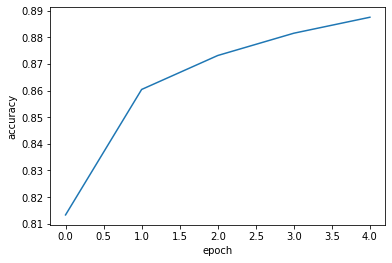

In [8]:
plt.plot(history.history['accuracy'])

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

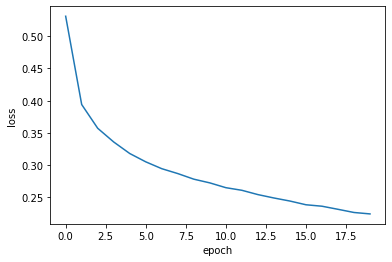

In [9]:
# 에포크를 보다 늘려보면,
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [13]:
# 에포크마다 검증 손실을 계산하기 위해 케라스 모델의 fit() 메소드에 검증 데이터를 전달
# validation_data 매개변수에 검증에 사용할 입력과 타깃값을 튜플로 만들어 전달
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data = (val_scaled, val_target))

In [14]:
# 반환된 history.history 딕셔너리에 들어 있는 키를 확인 하면
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


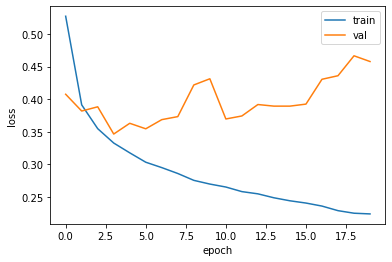

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
# 2.5 에포크 이후로 검증 손실값이 다시 튀는 것을 볼 수 있음
# 이를 뒤로 미룰 수록 정확도와 손실을 줄일 수 있음

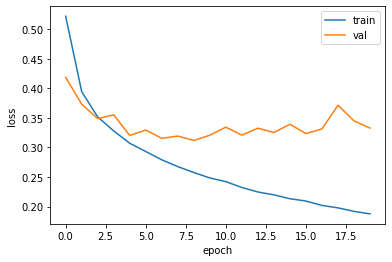

In [18]:
# 옵티마이저 하이퍼파라미터를 통해 과대적합을 완화해보면,
# 적응적 학습률을 사용하는 Adam 옵티마이저를 적용
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 드롭아웃 dropout
      훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(출력을 0으로) 과대적합을 막음
      이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 대한 과대 의존을 줄일 수 있음
      이론적으로 2개의 신경망을 앙상블하는 것과 같은 효과를 볼 수 있음

In [20]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()
# 드롭아웃은 입출력 겨로가에 영향을 미치지 않으나 평가, 예측 수행 시에는 적용하지 말아야 함(자동으로 됨)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


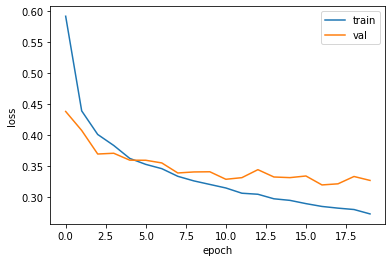

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
# 에포크가 늘어날 수록 결국 훈련 세트에 맞춰 학습하게 되므로 과대적합 되어감

In [23]:
# 따라서 에포크 횟수를 10으로 적절히 줄이고, 모델을 저장하면,
model = model_fn(keras.layers.Dropout(0.3))   # dropout 적용
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

In [24]:
# 케라스 모델은 훈련된 모델의 파라미터를 저장하는 save_weights() 메소드를 제공함
# 기본적으로 텐서플로의 체크포인트 포맷으로 저장하나, 파일의 확장자가 'h.5'일 경우 HDF5 포맷으로 저장
model.save_weights('model-weights.h5')

In [25]:
# 모델 구조와 모델 파라미터를 함께 저장하는 save() 메소드도 제공
# 기본적으로 SavedModel 포맷으로 저장, 파일의 확장자가 'h.5'일 경우 HDF5 포맷으로 저장
model.save('model-whole.h5')

In [26]:
!ls -al *.h5

-rw-r--r-- 1 root root 333448 Feb 18 07:26 model-weights.h5
-rw-r--r-- 1 root root 981360 Feb 18 07:27 model-whole.h5


In [29]:
# 훈련하지 않은 새로운 모델을 만들어 model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용할 수 있다
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')
# load_weights() 메소드를 통해 새로운 모델에 기존에 저장했던 모델 파라미터를 적재한 것

In [31]:
# 모델의 검증 정확도를 검사해보면,
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

# argmax() 함수를 통해 predict() 결과에서 가장 큰 값을 고름

375/375 [==============================] - 1s 1ms/step
0.8820833333333333


In [35]:
# 모델 전체를 파일에서 읽은 후 검증 세트의 정확도를 출력해보면,
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

# model-weights의 경우 파라미터를 저장, model-whole는 모델 전체를 저장했기에 후자의 경우 evaluate()를 통해 예측이 가능하지만, 전자는 compile() 후 사용하거나 predict()를 사용해야함

375/375 [==============================] - 1s 2ms/step - loss: 0.3274 - accuracy: 0.8821


[0.3273617923259735, 0.8820833563804626]

# 콜백 Callback
      훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체로 keras.callbacks 패키지 아래에 있는 클래스들

In [37]:
# fit() 메소드의 callbacks 매개변수에 리스트로 전달하여 사용
# ModelCheckpoint 콜백은 기본적으로 에포크마다 모델을 저장함
# save_best_only=True 매개변수를 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장 >> 최적
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)   # 저장될 파일명
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

In [39]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3185 - accuracy: 0.8861


[0.3184749484062195, 0.8860833048820496]

In [41]:
# 과대적합이 되기 전에 훈련을 중지하면 자원과 시간을 아낄 수 있음, 이를 '조기 종료'라 함
# keras에서는 조기 종료를 위한 EarlyStopping 콜백을 제공
# patience 매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 횟수를 지정
# restore_best_weights 매개변수를 True로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림
# EarlyStopping 콜백을 ModelCheckpoint 콜백과 함께 사용하면 효율이 좋음
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

In [44]:
print(early_stopping_cb.stopped_epoch)

11


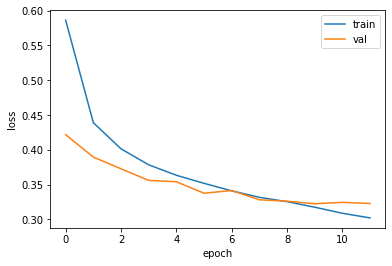

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [48]:
# 조기 종료 기법을 적용하면 에포크 횟수를 훈련 과정에서 크게 잡아도 됨
# 조기 종료로 얻은 모델의 검증 세트에 대한 성능을 확인하면,
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3225 - accuracy: 0.8830


[0.32248544692993164, 0.8830000162124634]

# 전체 소스코드

# 신경망 모델 훈련

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/7-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [ ]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 손실 곡선

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [ ]:
model = model_fn()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


2022-05-19 01:03:54.167698: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


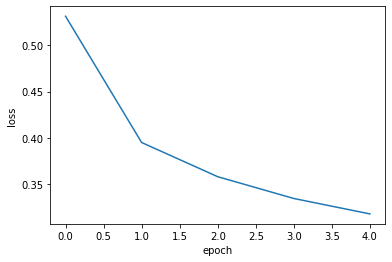

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

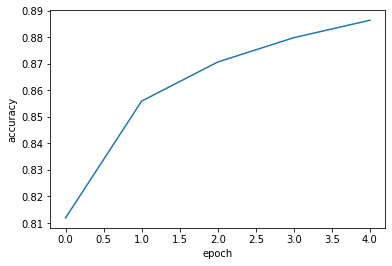

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

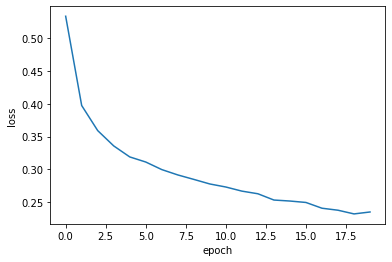

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 검증 손실

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


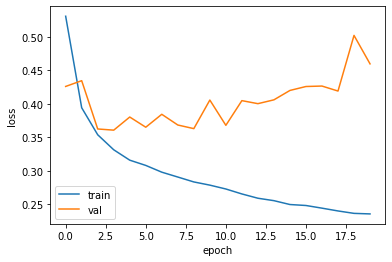

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

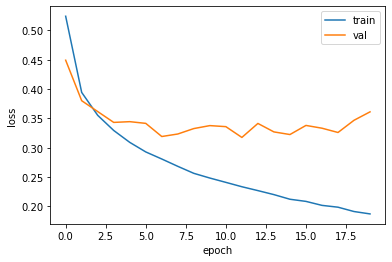

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 드롭아웃

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

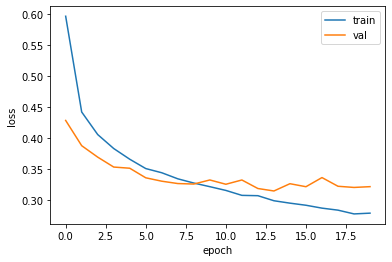

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 모델 저장과 복원

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=0, 
                    validation_data=(val_scaled, val_target))

In [ ]:
model.save_weights('model-weights.h5')

In [ ]:
model.save('model-whole.h5')

In [ ]:
!ls -al *.h5

-rw-r--r-- 1 studio-lab-user users 4049416 May 14 23:47 best-cnn-model.h5
-rw-r--r-- 1 studio-lab-user users  333448 May 19 01:08 model-weights.h5
-rw-r--r-- 1 studio-lab-user users  982664 May 19 01:08 model-whole.h5


In [ ]:
model = model_fn(keras.layers.Dropout(0.3))

model.load_weights('model-weights.h5')

In [ ]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 1ms/step
0.8843333333333333


In [ ]:
model = keras.models.load_model('model-whole.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3304 - accuracy: 0.8843


[0.33038878440856934, 0.8843333125114441]

## 콜백

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', 
                                                save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0, 
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [ ]:
model = keras.models.load_model('best-model.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3172 - accuracy: 0.8863


[0.31721678376197815, 0.8862500190734863]

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
print(early_stopping_cb.stopped_epoch)

9


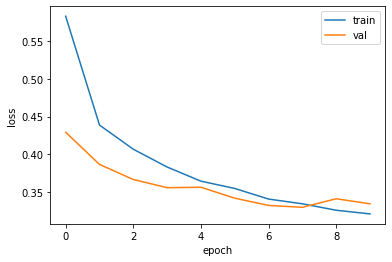

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3294 - accuracy: 0.8803


[0.3294179141521454, 0.8803333044052124]

# 총 정리

## 키워드

### 드롭아웃
      은닉층에 있는 뉴런의 출력을 랜덤하게 꺼서 과대적합을 막는 기범
      훈련 중에 적용되며 평가나 예측에서는 적용하지 않음
      텐서플로는 이를 자동으로 처리함

### 콜백
      케라스 모델을 훈련하는 도중에 어떤 작업을 수행할 수 있도록 도와주는 도구
      대표적으로 최상의 모델을 자동으로 저장해 주거나 검증 점수 향상이 보이지 않으면 조기 종료할 수 있음

## 핵심 패키지와 함수

### TensorFlow

#### Dropout
      드롭아웃 층
      첫 번째 매개변수로 드롭아웃 할 비율(r)을 지정,
      드롭아웃 하지 않는 뉴런의 출력은 1/(1-r)만큼 증가 시켜 출력의 총합이 같도록 만듦

#### save_weights()
        모든 층의 가중치와 절편을 파일에 저장
        첫 번째 매개변수에 저장할 파일을 지정
        save_format 매개변수에서 지정할 파일 포맷 지정, 디폴트는 텐서플로의 Checkpoint 포맷
        'h5'로 지정하거나 파일 확장자가 '.h5'면 HDF5로 저장

#### load_weights()
      모든 층의 가중치와 절편을 파일에 읽음
      첫 번째 매개변수에 읽을 파일 지정


#### save()
      모델 구조와 모든 가중치와 절편을 파일에 저장
      첫 번째 매개변수에 저장할 파일 지정
      save_format 매개변수에서 지정할 파일 포맷 지정, 디폴트는 텐서플로의 Checkpoint 포맷
      h5'로 지정하거나 파일 확장자가 '.h5'면 HDF5로 저장

#### load_model()
      저장된 모델을 로드
      첫 번째 매개변수에 읽을 파일 지정

#### ModelCheckpoint
      케라스 모델과 가중치를 일정 간격으로 저장
      첫 번째 매개변수에 저장할 파일을 지정
      monitor 매개변수는 모니터링할 지표를 지정, 디폴트는 'val_loss'
      save_weights_only 매개변수의 디폴트는 False로 전체 모델을 저장, True로 지정하면 모델의 가중치와 절편만 저장
      save_best_only 매개변수를 True로 지정하면 가장 낮은 검증 점수를 만드는 모델을 저장

#### EarlyStopping
      관심 지표가 더 이상 향상하지 않으면 훈련을 중지
      monitor 매개변수는 모니터링할 지표를 지정, 디폴트는 'val_loss'
      patience 매개변수에 모델이 더 이상 향상되지 않고 지속할 수 있는 최대 에포크 횟수 지정
      restore_best_weights 매개변수에 최상의 모델 가중치를 복원할지 지정, 디폴트는 False

### NumPy

#### argmax
      배열에서 축을 따라 최댓값의 인덱스를 반환
      axis 매개변수에서 어떤 축을 따라 최댓값을 찾을지 지정, 디폴트는 None으로 전체 배열에서 최댓값을 찾음

# 팁

1. 인공 신경망 모델이 최적화하는 대상은 정확도가 아니라 손실 함수이다. 따라서 정확도 보다는 손실 함수의 값을 확인해야 함!